# SPARC-4 Pipeline Tools
## Night of  ``2023-06-05`` - ``PHOTOMETRY``
***

This notebook shows an example of the full reduction of the SPARC4 data  in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link) using the SPARC4 pipeline tools. 

* Author: Eder Martioli, LNA 18 Apr 2024

In [1]:
import os, sys
import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib
import sparc4.utils as s4utils
import glob
import warnings
warnings.filterwarnings('ignore')

## User inputs and initial setup

Before starting the reduction, we must configure a few parameters. The pipeline comes with default values for all parameters. To modify these, one can create and edit their own parameter file, then load it into the ``PARAMS_FILE`` variable. Alternatively, parameters can be changed by directly resetting the dictionary entry for a specific parameter, like this: ``p['PARAM_NAME'] = PARAM_NEW_VALUE``. See examples below.

In [2]:
# set night directory name
NIGHTDIR = '20230605'
# set raw data root directory
ROOTDATADIR =  "/Users/eder/Data/SPARC4/minidata/"
# set reduced data root directory
ROOTREDUCEDDIR = "/Users/eder/Data/SPARC4/minidata/reduced/"
# set reduced data root directory
PIPELINEDIR = "/Users/eder/sparc4-pipeline/"
# define path to default calibration directory
calibdb_dir = os.path.join(PIPELINEDIR, "calibdb/")

# set path to the parameters file:
#PARAMS_FILE = ""  # to use deafult values
PARAMS_FILE = "{}/user_files/my_params.yaml".format(PIPELINEDIR)

# set path to a target list file
# this is to force targets to be included in the source catalog in addition to those detected automatically
TARGET_LIST_FILE = os.path.join(PIPELINEDIR,"user_files/targets.csv")

# select a SPARC4 channel: 1 (g), 2 (r), 3 (i) or 4 (z)
CHANNEL = 2

# initialize pipeline parameters
p = s4pipelib.init_s4_p(NIGHTDIR,
                        ROOTDATADIR,
                        ROOTREDUCEDDIR,
                        print_report=False,
                        param_file=PARAMS_FILE)

# get data dir
datadir = p['data_directories'][CHANNEL-1]
# get reduce dir
reducedir = p['reduce_directories'][CHANNEL-1]

# to force reduction even if products already exist
FORCE = False

###############################################################
# Below are a few examples on how to manually reset parameters: 
###############################################################

# set astrometry reference image as the one for this channel
p["ASTROM_REF_IMG"] = os.path.join(calibdb_dir, p["ASTROM_REF_IMGS"][CHANNEL-1])

# to build stacks of 10 images instead of the default value of 16 images
p['NFILES_FOR_STACK'] = 10

# to change the S/N threshold for detecting sources
# -- note that lower values will result in more (fainter) sources being detected.
p['PHOT_THRESHOLD'] = 30

# uncomment below to print all parameters and their respective values:
#for key in p.keys():
#    print("p['{}']={}".format(key,p[key]))

***
# <font color='darkblue'>Bias and Flat-field calibrations</font> 

In this section we build the master bias and flat-field calibrations.

## Define input list and output product file names

In [3]:
# create a list of zeros for current detector mode
zero_list = glob.glob("{}/{}".format(datadir,"*zero*.fits"))

# define file name of master bias 
p["master_bias"] = "{}/{}_s4c{}_MasterZero.fits".format(reducedir,
                                                   NIGHTDIR,
                                                   CHANNEL)

# create a list of flats for current detector mode
flat_list = glob.glob("{}/{}".format(datadir,"*dflat*.fits"))

# define file name of master flat
p["master_flat"] = "{}/{}_s4c{}_MasterDomeFlat.fits".format(reducedir,
                                                   NIGHTDIR,
                                                   CHANNEL)

# Run master calibration

The master calibration routine combines a list of calibration files into a master calibration image.

In [4]:
# calculate master bias and save product to FITS
p = s4pipelib.run_master_calibration(p, 
                                     inputlist=zero_list, 
                                     output=p["master_bias"], 
                                     obstype='bias', 
                                     data_dir=datadir, 
                                     reduce_dir=reducedir, 
                                     force=FORCE)

2024-04-24 20:42:16,749 root - INFO - bias files: 3  [pipeline_lib]


2024-04-24 20:42:16,749 | INFO | bias files: 3


2024-04-24 20:42:16,804 root - INFO - gain:3.3 electron / adu  [pipeline_lib]


2024-04-24 20:42:16,804 | INFO | gain:3.3 electron / adu


2024-04-24 20:42:16,805 root - INFO - processing frame 1 of 3  [pipeline_lib]


2024-04-24 20:42:16,805 | INFO | processing frame 1 of 3


2024-04-24 20:42:16,907 root - INFO - processing frame 2 of 3  [pipeline_lib]


2024-04-24 20:42:16,907 | INFO | processing frame 2 of 3


2024-04-24 20:42:17,005 root - INFO - processing frame 3 of 3  [pipeline_lib]


2024-04-24 20:42:17,005 | INFO | processing frame 3 of 3


2024-04-24 20:42:17,121 astropop - INFO - Combining 3 images with median method.  [imcombine]


2024-04-24 20:42:17,121 | INFO | Combining 3 images with median method.


2024-04-24 20:42:17,194 root - INFO - Normalization mean value:1650.6460764884941 electron  [pipeline_lib]


2024-04-24 20:42:17,194 | INFO | Normalization mean value:1650.6460764884941 electron


In [5]:
# calculate master dome flat and save product to FITS
p = s4pipelib.run_master_calibration(p, 
                                     inputlist=flat_list, 
                                     output=p["master_flat"], 
                                     obstype='flat', 
                                     data_dir=datadir, 
                                     reduce_dir=reducedir, 
                                     normalize=True, 
                                     force=FORCE)

2024-04-24 20:42:17,365 root - INFO - flat files: 3  [pipeline_lib]


2024-04-24 20:42:17,365 | INFO | flat files: 3


2024-04-24 20:42:17,415 root - INFO - gain:3.3 electron / adu  [pipeline_lib]


2024-04-24 20:42:17,415 | INFO | gain:3.3 electron / adu


2024-04-24 20:42:17,415 root - INFO - processing frame 1 of 3  [pipeline_lib]


2024-04-24 20:42:17,415 | INFO | processing frame 1 of 3


2024-04-24 20:42:17,514 root - INFO - processing frame 2 of 3  [pipeline_lib]


2024-04-24 20:42:17,514 | INFO | processing frame 2 of 3


2024-04-24 20:42:17,617 root - INFO - processing frame 3 of 3  [pipeline_lib]


2024-04-24 20:42:17,617 | INFO | processing frame 3 of 3


2024-04-24 20:42:17,729 astropop - INFO - Combining 3 images with median method.  [imcombine]


2024-04-24 20:42:17,729 | INFO | Combining 3 images with median method.


2024-04-24 20:42:17,798 root - INFO - Normalization mean value:55943.00104351044 electron  [pipeline_lib]


2024-04-24 20:42:17,798 | INFO | Normalization mean value:55943.00104351044 electron


# Plot master calibration results

Now, we plot the results to check if they look fine. 

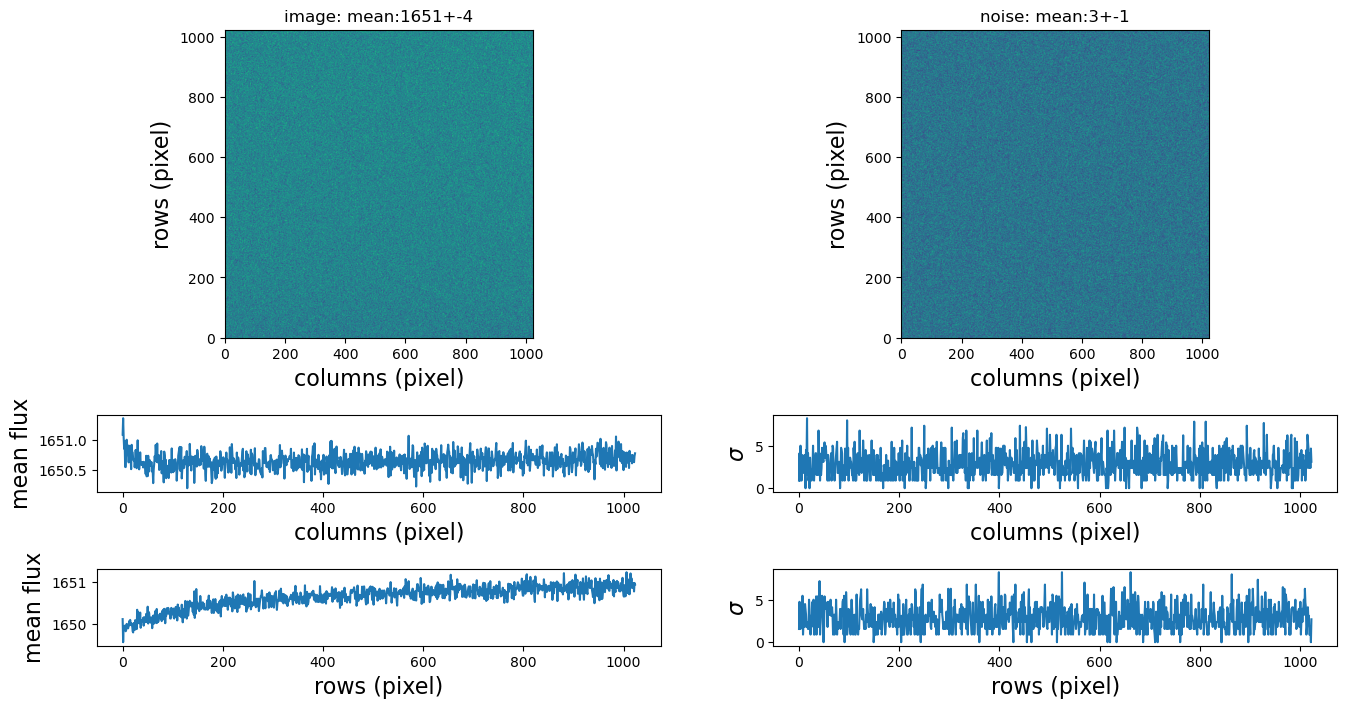

In [6]:
# plot master bias
s4plt.plot_cal_frame(p["master_bias"], 
                     percentile=99.5, 
                     combine_rows=True, 
                     combine_cols=True)

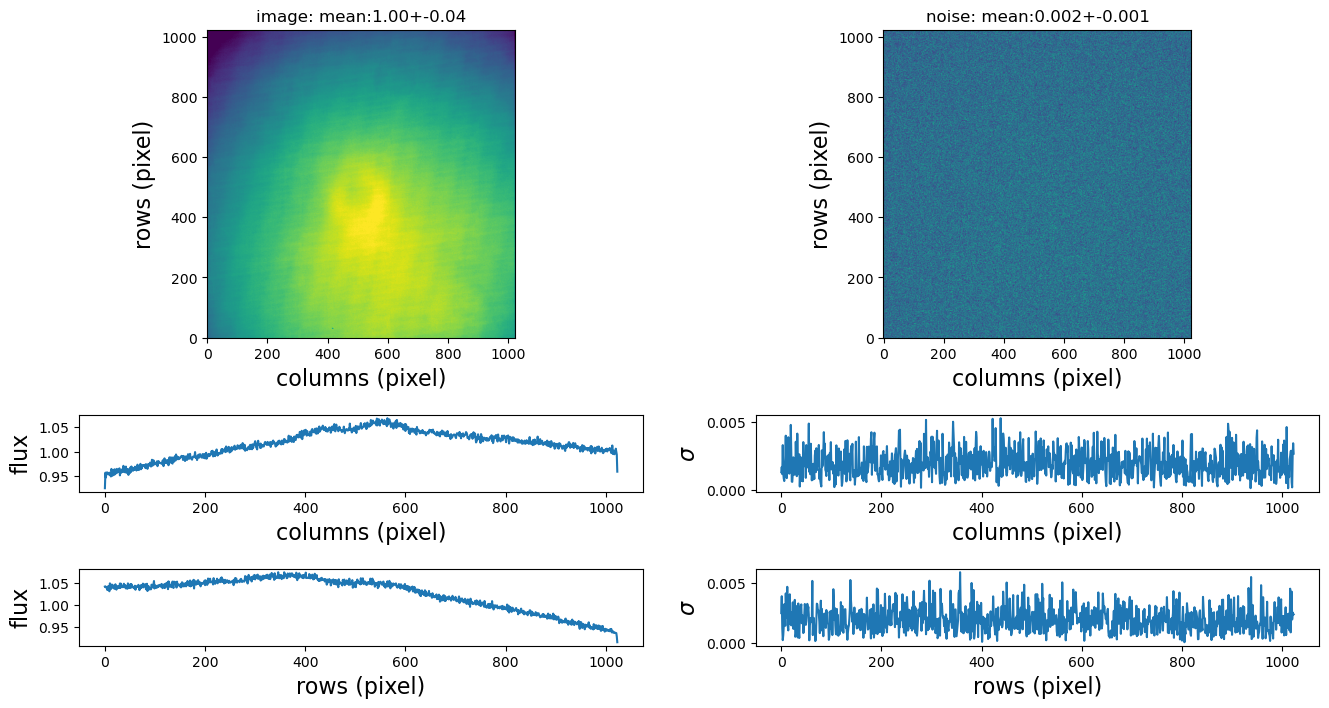

In [7]:
# plot master flat
s4plt.plot_cal_frame(p["master_flat"], 
                     percentile=99.5, 
                     xcut=512, 
                     ycut=512)

***
# <font color='darkblue'>Science image reduction - Photometry </font> 

In this section we reduce the science data. In this example we show the reductiion processes for the following observations:

* The astrometric calibration field [CR3](https://simbad.u-strasbg.fr/simbad/sim-basic?Ident=14%3A38%3A08+-42%3A35%3A14&submit=SIMBAD+search) observed in photometric mode. 

### Select C3 data

In [8]:
# set an object ID matching the ID in the image header keyword 'OBJECT'
OBJECTID = "CR3"  # LTT 4816 is a spectro-photometric standard

# set suffix for output stack filename
stack_suffix = "{}_s4c{}_{}".format(NIGHTDIR, 
                                    CHANNEL, 
                                    OBJECTID.replace(" ",""))
# create a list of science data 
sci_list = glob.glob("{}/{}".format(datadir,"*cr3.fits"))

### Reduce scientific exposures in `PHOTOMETRIC` mode

To reduce scientific frames, run the routine ``s4pipelib.stack_and_reduce_sci_images``. This routine performs calibration for detector gain, bias, and flat-field. Then, a subset of frames is stacked to generate a stack product. Source detection is then conducted within the stack frame, and the identified sources are cross-referenced with a catalog to establish an astrometric solution and generate a master catalog for all input observations of this field. Aperture photometry is computed for several aperture sizes across all sources and for all input image frames. Finally, the resulting calibrated images and their associated photometric catalogs are saved into ``proc.fits`` product FITS files.

2024-04-24 20:42:23,074 root - INFO - Reference image: /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001083_cr3.fits  [pipeline_lib]


2024-04-24 20:42:23,074 | INFO | Reference image: /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001083_cr3.fits


2024-04-24 20:42:23,115 root - INFO - OBJECT files: 10  [pipeline_lib]


2024-04-24 20:42:23,115 | INFO | OBJECT files: 10


2024-04-24 20:42:23,115 root - INFO - Loading science frames to memory ...   [pipeline_lib]


2024-04-24 20:42:23,115 | INFO | Loading science frames to memory ... 


2024-04-24 20:42:23,262 root - INFO - gain:3.3 electron / adu  [pipeline_lib]


2024-04-24 20:42:23,262 | INFO | gain:3.3 electron / adu


2024-04-24 20:42:23,262 root - INFO - Calibrating science frames (CR, gain, bias, flat) ...   [pipeline_lib]


2024-04-24 20:42:23,262 | INFO | Calibrating science frames (CR, gain, bias, flat) ... 


2024-04-24 20:42:23,263 root - INFO - Calibrating science frame 1 of 10 : 20230605_s4c2_001083_cr3.fits   [pipeline_lib]


2024-04-24 20:42:23,263 | INFO | Calibrating science frame 1 of 10 : 20230605_s4c2_001083_cr3.fits 


2024-04-24 20:42:23,643 root - INFO - Calibrating science frame 2 of 10 : 20230605_s4c2_001082_cr3.fits   [pipeline_lib]


2024-04-24 20:42:23,643 | INFO | Calibrating science frame 2 of 10 : 20230605_s4c2_001082_cr3.fits 


2024-04-24 20:42:24,011 root - INFO - Calibrating science frame 3 of 10 : 20230605_s4c2_001076_cr3.fits   [pipeline_lib]


2024-04-24 20:42:24,011 | INFO | Calibrating science frame 3 of 10 : 20230605_s4c2_001076_cr3.fits 


2024-04-24 20:42:24,396 root - INFO - Calibrating science frame 4 of 10 : 20230605_s4c2_001077_cr3.fits   [pipeline_lib]


2024-04-24 20:42:24,396 | INFO | Calibrating science frame 4 of 10 : 20230605_s4c2_001077_cr3.fits 


2024-04-24 20:42:24,773 root - INFO - Calibrating science frame 5 of 10 : 20230605_s4c2_001080_cr3.fits   [pipeline_lib]


2024-04-24 20:42:24,773 | INFO | Calibrating science frame 5 of 10 : 20230605_s4c2_001080_cr3.fits 


2024-04-24 20:42:25,134 root - INFO - Calibrating science frame 6 of 10 : 20230605_s4c2_001081_cr3.fits   [pipeline_lib]


2024-04-24 20:42:25,134 | INFO | Calibrating science frame 6 of 10 : 20230605_s4c2_001081_cr3.fits 


2024-04-24 20:42:25,511 root - INFO - Calibrating science frame 7 of 10 : 20230605_s4c2_001078_cr3.fits   [pipeline_lib]


2024-04-24 20:42:25,511 | INFO | Calibrating science frame 7 of 10 : 20230605_s4c2_001078_cr3.fits 


2024-04-24 20:42:25,868 root - INFO - Calibrating science frame 8 of 10 : 20230605_s4c2_001079_cr3.fits   [pipeline_lib]


2024-04-24 20:42:25,868 | INFO | Calibrating science frame 8 of 10 : 20230605_s4c2_001079_cr3.fits 


2024-04-24 20:42:26,229 root - INFO - Calibrating science frame 9 of 10 : 20230605_s4c2_001075_cr3.fits   [pipeline_lib]


2024-04-24 20:42:26,229 | INFO | Calibrating science frame 9 of 10 : 20230605_s4c2_001075_cr3.fits 


2024-04-24 20:42:26,597 root - INFO - Calibrating science frame 10 of 10 : 20230605_s4c2_001074_cr3.fits   [pipeline_lib]


2024-04-24 20:42:26,597 | INFO | Calibrating science frame 10 of 10 : 20230605_s4c2_001074_cr3.fits 


2024-04-24 20:42:26,967 root - INFO - Registering science frames and stacking them ...   [pipeline_lib]


2024-04-24 20:42:26,967 | INFO | Registering science frames and stacking them ... 


2024-04-24 20:42:26,967 root - INFO - Selected file for stack:0 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001083_cr3.fits  [pipeline_lib]


2024-04-24 20:42:26,967 | INFO | Selected file for stack:0 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001083_cr3.fits


2024-04-24 20:42:26,969 root - INFO - Selected file for stack:1 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001082_cr3.fits  [pipeline_lib]


2024-04-24 20:42:26,969 | INFO | Selected file for stack:1 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001082_cr3.fits


2024-04-24 20:42:26,970 root - INFO - Selected file for stack:2 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001076_cr3.fits  [pipeline_lib]


2024-04-24 20:42:26,970 | INFO | Selected file for stack:2 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001076_cr3.fits


2024-04-24 20:42:26,972 root - INFO - Selected file for stack:3 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001077_cr3.fits  [pipeline_lib]


2024-04-24 20:42:26,972 | INFO | Selected file for stack:3 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001077_cr3.fits


2024-04-24 20:42:26,973 root - INFO - Selected file for stack:4 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001080_cr3.fits  [pipeline_lib]


2024-04-24 20:42:26,973 | INFO | Selected file for stack:4 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001080_cr3.fits


2024-04-24 20:42:26,975 root - INFO - Selected file for stack:5 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001081_cr3.fits  [pipeline_lib]


2024-04-24 20:42:26,975 | INFO | Selected file for stack:5 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001081_cr3.fits


2024-04-24 20:42:26,976 root - INFO - Selected file for stack:6 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001078_cr3.fits  [pipeline_lib]


2024-04-24 20:42:26,976 | INFO | Selected file for stack:6 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001078_cr3.fits


2024-04-24 20:42:26,978 root - INFO - Selected file for stack:7 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001079_cr3.fits  [pipeline_lib]


2024-04-24 20:42:26,978 | INFO | Selected file for stack:7 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001079_cr3.fits


2024-04-24 20:42:26,980 root - INFO - Selected file for stack:8 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001075_cr3.fits  [pipeline_lib]


2024-04-24 20:42:26,980 | INFO | Selected file for stack:8 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001075_cr3.fits


2024-04-24 20:42:26,983 root - INFO - Selected file for stack:9 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001074_cr3.fits  [pipeline_lib]


2024-04-24 20:42:26,983 | INFO | Selected file for stack:9 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001074_cr3.fits


2024-04-24 20:42:26,988 astropop - INFO - Registering image 1 from 10  [register]


2024-04-24 20:42:26,988 | INFO | Registering image 1 from 10


2024-04-24 20:42:26,990 astropop - INFO - Images are equal, skipping registering.  [register]


2024-04-24 20:42:26,990 | INFO | Images are equal, skipping registering.


2024-04-24 20:42:27,064 astropop - INFO - Registering image 2 from 10  [register]


2024-04-24 20:42:27,064 | INFO | Registering image 2 from 10


2024-04-24 20:42:27,149 astropop - INFO - Filling registered image with cval=266.06  [register]


2024-04-24 20:42:27,149 | INFO | Filling registered image with cval=266.06


2024-04-24 20:42:27,155 astropop - INFO - Registering image with: translation=[-0.75  0.75], rotation=0.00°  [register]


2024-04-24 20:42:27,155 | INFO | Registering image with: translation=[-0.75  0.75], rotation=0.00°


2024-04-24 20:42:27,278 astropop - INFO - Registering image 3 from 10  [register]


2024-04-24 20:42:27,278 | INFO | Registering image 3 from 10


2024-04-24 20:42:27,370 astropop - INFO - Filling registered image with cval=271.36  [register]


2024-04-24 20:42:27,370 | INFO | Filling registered image with cval=271.36


2024-04-24 20:42:27,382 astropop - INFO - Registering image with: translation=[-0.25  1.75], rotation=0.00°  [register]


2024-04-24 20:42:27,382 | INFO | Registering image with: translation=[-0.25  1.75], rotation=0.00°


2024-04-24 20:42:27,507 astropop - INFO - Registering image 4 from 10  [register]


2024-04-24 20:42:27,507 | INFO | Registering image 4 from 10


2024-04-24 20:42:27,587 astropop - INFO - Filling registered image with cval=267.98  [register]


2024-04-24 20:42:27,587 | INFO | Filling registered image with cval=267.98


2024-04-24 20:42:27,592 astropop - INFO - Registering image with: translation=[-0.   1.5], rotation=0.00°  [register]


2024-04-24 20:42:27,592 | INFO | Registering image with: translation=[-0.   1.5], rotation=0.00°


2024-04-24 20:42:27,712 astropop - INFO - Registering image 5 from 10  [register]


2024-04-24 20:42:27,712 | INFO | Registering image 5 from 10


2024-04-24 20:42:27,805 astropop - INFO - Filling registered image with cval=266.32  [register]


2024-04-24 20:42:27,805 | INFO | Filling registered image with cval=266.32


2024-04-24 20:42:27,810 astropop - INFO - Registering image with: translation=[-0.25 -0.  ], rotation=0.00°  [register]


2024-04-24 20:42:27,810 | INFO | Registering image with: translation=[-0.25 -0.  ], rotation=0.00°


2024-04-24 20:42:27,937 astropop - INFO - Registering image 6 from 10  [register]


2024-04-24 20:42:27,937 | INFO | Registering image 6 from 10


2024-04-24 20:42:28,044 astropop - INFO - Filling registered image with cval=266.19  [register]


2024-04-24 20:42:28,044 | INFO | Filling registered image with cval=266.19


2024-04-24 20:42:28,055 astropop - INFO - Registering image with: translation=[1.25 0.5 ], rotation=0.00°  [register]


2024-04-24 20:42:28,055 | INFO | Registering image with: translation=[1.25 0.5 ], rotation=0.00°


2024-04-24 20:42:28,227 astropop - INFO - Registering image 7 from 10  [register]


2024-04-24 20:42:28,227 | INFO | Registering image 7 from 10


2024-04-24 20:42:28,349 astropop - INFO - Filling registered image with cval=270.72  [register]


2024-04-24 20:42:28,349 | INFO | Filling registered image with cval=270.72


2024-04-24 20:42:28,359 astropop - INFO - Registering image with: translation=[-0.5   0.75], rotation=0.00°  [register]


2024-04-24 20:42:28,359 | INFO | Registering image with: translation=[-0.5   0.75], rotation=0.00°


2024-04-24 20:42:28,502 astropop - INFO - Registering image 8 from 10  [register]


2024-04-24 20:42:28,502 | INFO | Registering image 8 from 10


2024-04-24 20:42:28,625 astropop - INFO - Filling registered image with cval=266.64  [register]


2024-04-24 20:42:28,625 | INFO | Filling registered image with cval=266.64


2024-04-24 20:42:28,637 astropop - INFO - Registering image with: translation=[-1.    0.25], rotation=0.00°  [register]


2024-04-24 20:42:28,637 | INFO | Registering image with: translation=[-1.    0.25], rotation=0.00°


2024-04-24 20:42:28,773 astropop - INFO - Registering image 9 from 10  [register]


2024-04-24 20:42:28,773 | INFO | Registering image 9 from 10


2024-04-24 20:42:28,896 astropop - INFO - Filling registered image with cval=268.21  [register]


2024-04-24 20:42:28,896 | INFO | Filling registered image with cval=268.21


2024-04-24 20:42:28,899 astropop - INFO - Registering image with: translation=[-0.5  2. ], rotation=0.00°  [register]


2024-04-24 20:42:28,899 | INFO | Registering image with: translation=[-0.5  2. ], rotation=0.00°


2024-04-24 20:42:29,037 astropop - INFO - Registering image 10 from 10  [register]


2024-04-24 20:42:29,037 | INFO | Registering image 10 from 10


2024-04-24 20:42:29,159 astropop - INFO - Filling registered image with cval=268.62  [register]


2024-04-24 20:42:29,159 | INFO | Filling registered image with cval=268.62


2024-04-24 20:42:29,174 astropop - INFO - Registering image with: translation=[-0.   1.5], rotation=0.00°  [register]


2024-04-24 20:42:29,174 | INFO | Registering image with: translation=[-0.   1.5], rotation=0.00°


2024-04-24 20:42:29,439 astropop - INFO - Combining 10 images with mean method.  [imcombine]


2024-04-24 20:42:29,439 | INFO | Combining 10 images with mean method.


2024-04-24 20:42:31,506 root - INFO - Creating new catalog of detected sources:  [pipeline_lib]


2024-04-24 20:42:31,506 | INFO | Creating new catalog of detected sources:


2024-04-24 20:42:31,858 root - INFO - Solving astrometry in PHOT-MODE using astrometry_from_existing_wcs()  [pipeline_lib]


2024-04-24 20:42:31,858 | INFO | Solving astrometry in PHOT-MODE using astrometry_from_existing_wcs()


2024-04-24 20:42:31,858 root - INFO - No sky coordinates given, searching sources in online catalogs  [pipeline_lib]


2024-04-24 20:42:31,858 | INFO | No sky coordinates given, searching sources in online catalogs


2024-04-24 20:42:31,859 root - INFO - Querying Gaia DR3 using twirl  [pipeline_lib]


2024-04-24 20:42:31,859 | INFO | Querying Gaia DR3 using twirl


2024-04-24 20:42:32,872 root - INFO - Matching sources with catalog and solving astrometry to compute WCS  [pipeline_lib]


2024-04-24 20:42:32,872 | INFO | Matching sources with catalog and solving astrometry to compute WCS


2024-04-24 20:42:33,628 root - INFO - Running photometry for multiple apertures:  [pipeline_lib]


2024-04-24 20:42:33,628 | INFO | Running photometry for multiple apertures:


2024-04-24 20:42:33,629 root - INFO - Aperture radius of 6 pixels: 1 of 6 :  [pipeline_lib]


2024-04-24 20:42:33,629 | INFO | Aperture radius of 6 pixels: 1 of 6 :


2024-04-24 20:42:34,016 root - INFO - Aperture radius of 8 pixels: 2 of 6 :  [pipeline_lib]


2024-04-24 20:42:34,016 | INFO | Aperture radius of 8 pixels: 2 of 6 :


2024-04-24 20:42:34,364 root - INFO - Aperture radius of 10 pixels: 3 of 6 :  [pipeline_lib]


2024-04-24 20:42:34,364 | INFO | Aperture radius of 10 pixels: 3 of 6 :


2024-04-24 20:42:34,711 root - INFO - Aperture radius of 12 pixels: 4 of 6 :  [pipeline_lib]


2024-04-24 20:42:34,711 | INFO | Aperture radius of 12 pixels: 4 of 6 :


2024-04-24 20:42:35,067 root - INFO - Aperture radius of 14 pixels: 5 of 6 :  [pipeline_lib]


2024-04-24 20:42:35,067 | INFO | Aperture radius of 14 pixels: 5 of 6 :


2024-04-24 20:42:35,421 root - INFO - Aperture radius of 16 pixels: 6 of 6 :  [pipeline_lib]


2024-04-24 20:42:35,421 | INFO | Aperture radius of 16 pixels: 6 of 6 :


2024-04-24 20:42:36,176 root - INFO - The 10 images will be reduced in 1 loops of 100 images each time  [pipeline_lib]


2024-04-24 20:42:36,176 | INFO | The 10 images will be reduced in 1 loops of 100 images each time


2024-04-24 20:42:36,177 root - INFO - Running loop 0 of 1 -> images in loop: 0 to 10 ...   [pipeline_lib]


2024-04-24 20:42:36,177 | INFO | Running loop 0 of 1 -> images in loop: 0 to 10 ... 


2024-04-24 20:42:36,306 root - INFO - OBJECT files: 10  [pipeline_lib]


2024-04-24 20:42:36,306 | INFO | OBJECT files: 10


2024-04-24 20:42:36,306 root - INFO - Creating output list of processed science frames ...   [pipeline_lib]


2024-04-24 20:42:36,306 | INFO | Creating output list of processed science frames ... 


2024-04-24 20:42:36,307 root - INFO - 1 of 10 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs2//20230605/20230605_s4c2_001083_cr3_proc.fits  [pipeline_lib]


2024-04-24 20:42:36,307 | INFO | 1 of 10 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs2//20230605/20230605_s4c2_001083_cr3_proc.fits


2024-04-24 20:42:36,308 root - INFO - 2 of 10 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs2//20230605/20230605_s4c2_001082_cr3_proc.fits  [pipeline_lib]


2024-04-24 20:42:36,308 | INFO | 2 of 10 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs2//20230605/20230605_s4c2_001082_cr3_proc.fits


2024-04-24 20:42:36,308 root - INFO - 3 of 10 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs2//20230605/20230605_s4c2_001076_cr3_proc.fits  [pipeline_lib]


2024-04-24 20:42:36,308 | INFO | 3 of 10 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs2//20230605/20230605_s4c2_001076_cr3_proc.fits


2024-04-24 20:42:36,309 root - INFO - 4 of 10 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs2//20230605/20230605_s4c2_001077_cr3_proc.fits  [pipeline_lib]


2024-04-24 20:42:36,309 | INFO | 4 of 10 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs2//20230605/20230605_s4c2_001077_cr3_proc.fits


2024-04-24 20:42:36,310 root - INFO - 5 of 10 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs2//20230605/20230605_s4c2_001080_cr3_proc.fits  [pipeline_lib]


2024-04-24 20:42:36,310 | INFO | 5 of 10 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs2//20230605/20230605_s4c2_001080_cr3_proc.fits


2024-04-24 20:42:36,310 root - INFO - 6 of 10 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs2//20230605/20230605_s4c2_001081_cr3_proc.fits  [pipeline_lib]


2024-04-24 20:42:36,310 | INFO | 6 of 10 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs2//20230605/20230605_s4c2_001081_cr3_proc.fits


2024-04-24 20:42:36,311 root - INFO - 7 of 10 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs2//20230605/20230605_s4c2_001078_cr3_proc.fits  [pipeline_lib]


2024-04-24 20:42:36,311 | INFO | 7 of 10 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs2//20230605/20230605_s4c2_001078_cr3_proc.fits


2024-04-24 20:42:36,312 root - INFO - 8 of 10 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs2//20230605/20230605_s4c2_001079_cr3_proc.fits  [pipeline_lib]


2024-04-24 20:42:36,312 | INFO | 8 of 10 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs2//20230605/20230605_s4c2_001079_cr3_proc.fits


2024-04-24 20:42:36,312 root - INFO - 9 of 10 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs2//20230605/20230605_s4c2_001075_cr3_proc.fits  [pipeline_lib]


2024-04-24 20:42:36,312 | INFO | 9 of 10 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs2//20230605/20230605_s4c2_001075_cr3_proc.fits


2024-04-24 20:42:36,313 root - INFO - 10 of 10 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs2//20230605/20230605_s4c2_001074_cr3_proc.fits  [pipeline_lib]


2024-04-24 20:42:36,313 | INFO | 10 of 10 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs2//20230605/20230605_s4c2_001074_cr3_proc.fits


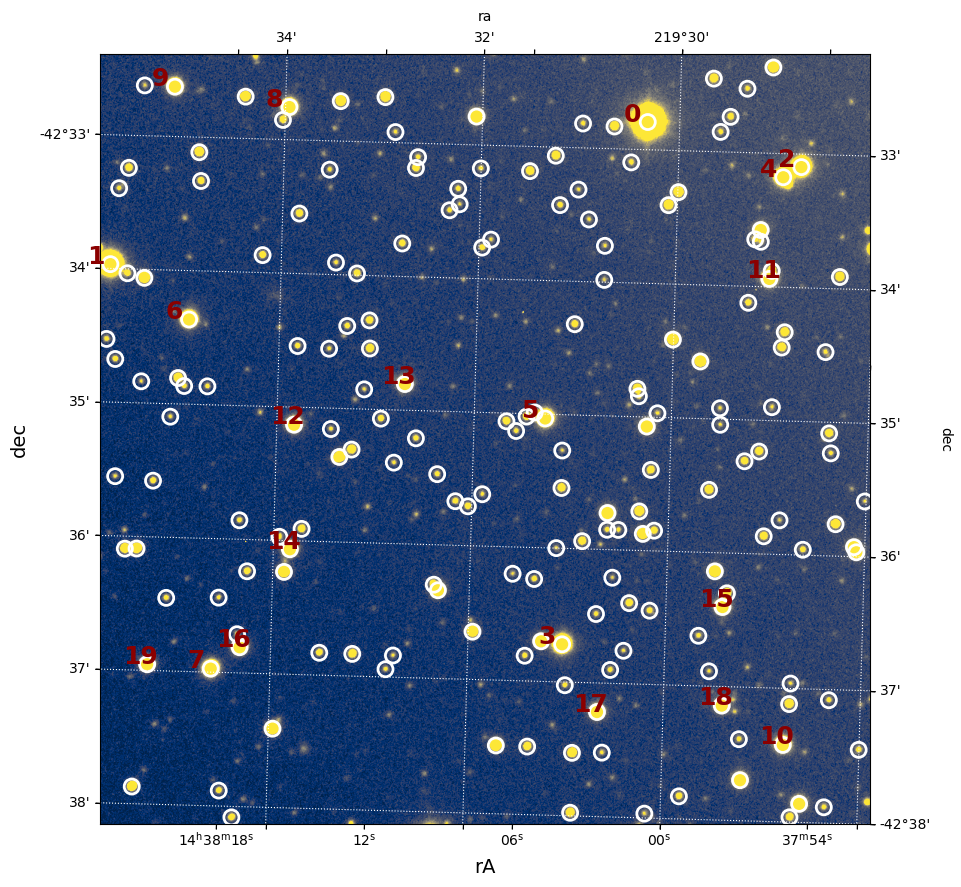

In [9]:
# run stack and reduce individual science images (produce *_proc.fits)
p = s4pipelib.stack_and_reduce_sci_images(p,
                                          sci_list,
                                          reducedir,
                                          stack_suffix=stack_suffix,
                                          force=FORCE,
                                          plot=True) 

### PLOT results

The function ``s4plt.plot_sci_frame`` can be used to plot ``proc.fits`` or ``stack.fits`` products, as in the example below.  

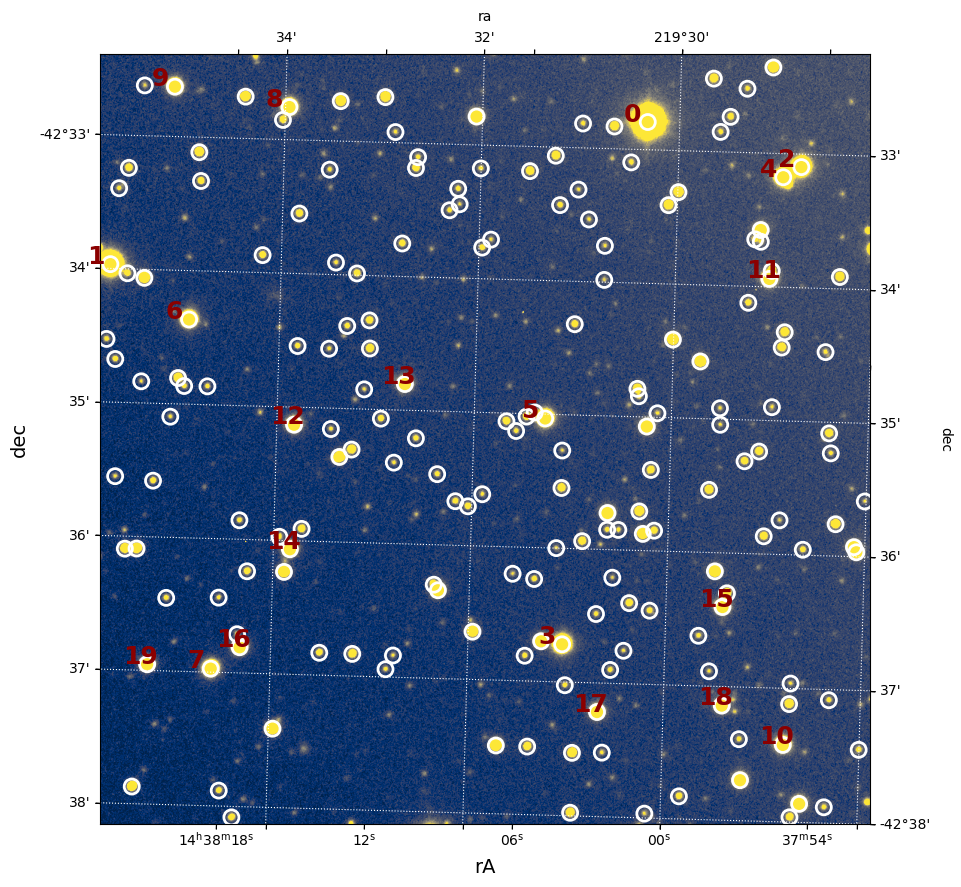

In [10]:
s4plt.plot_sci_frame(p['OBJECT_STACK'], cat_ext=3, nstars=20, use_sky_coords=True)

## Time series of `PHOTOMETRY` data : `light curve`

In this section, we compile all photometric information from the reduced ``proc.fits`` frames into a photometric time series product (`light curve`) using the routine ``s4pipelib.phot_time_series``. For this example, since there are only a few frames, the time series is not particularly interesting, as it contains only a few points in the time series.

In [11]:
ts_suffix = "{}_s4c{}_{}".format(NIGHTDIR, CHANNEL, OBJECTID.replace(" ",""))

list_of_catalogs = s4pipelib.get_list_of_catalogs(p['PHOT_APERTURES_FOR_LIGHTCURVES'])

phot_ts_product = s4pipelib.phot_time_series(p['OBJECT_REDUCED_IMAGES'][1:],
                                             ts_suffix=ts_suffix,
                                             reduce_dir=reducedir,
                                             time_key=p['TIME_KEYWORD_IN_PROC'],
                                             time_format=p['TIME_FORMAT_IN_PROC'],
                                             catalog_names=list_of_catalogs,
                                             time_span_for_rms=p['TIME_SPAN_FOR_RMS'],
                                             force=FORCE)

2024-04-24 20:42:38,133 root - INFO - Packing time series data for catalog: CATALOG_PHOT_AP006  [pipeline_lib]


2024-04-24 20:42:38,133 | INFO | Packing time series data for catalog: CATALOG_PHOT_AP006


2024-04-24 20:42:38,249 root - INFO - Packing time series data for catalog: CATALOG_PHOT_AP008  [pipeline_lib]


2024-04-24 20:42:38,249 | INFO | Packing time series data for catalog: CATALOG_PHOT_AP008


2024-04-24 20:42:38,342 root - INFO - Packing time series data for catalog: CATALOG_PHOT_AP010  [pipeline_lib]


2024-04-24 20:42:38,342 | INFO | Packing time series data for catalog: CATALOG_PHOT_AP010


2024-04-24 20:42:38,437 root - INFO - Packing time series data for catalog: CATALOG_PHOT_AP012  [pipeline_lib]


2024-04-24 20:42:38,437 | INFO | Packing time series data for catalog: CATALOG_PHOT_AP012


2024-04-24 20:42:38,538 root - INFO - Packing time series data for catalog: CATALOG_PHOT_AP014  [pipeline_lib]


2024-04-24 20:42:38,538 | INFO | Packing time series data for catalog: CATALOG_PHOT_AP014


2024-04-24 20:42:38,634 root - INFO - Packing time series data for catalog: CATALOG_PHOT_AP016  [pipeline_lib]


2024-04-24 20:42:38,634 | INFO | Packing time series data for catalog: CATALOG_PHOT_AP016


The function ``s4plt.plot_light_curve`` enables access to the photometric time series product and facilitates the construction of differential photometric light curves. The results are plotted and returned as an Astropy Table, which can also be saved to an output CSV file.

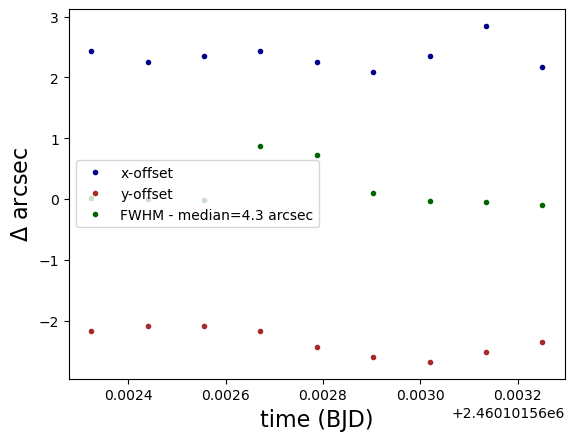

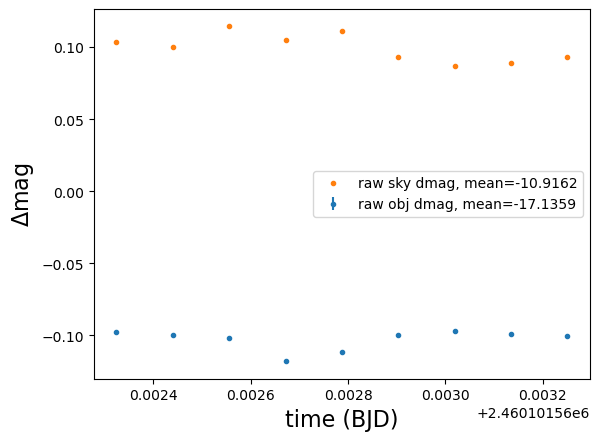

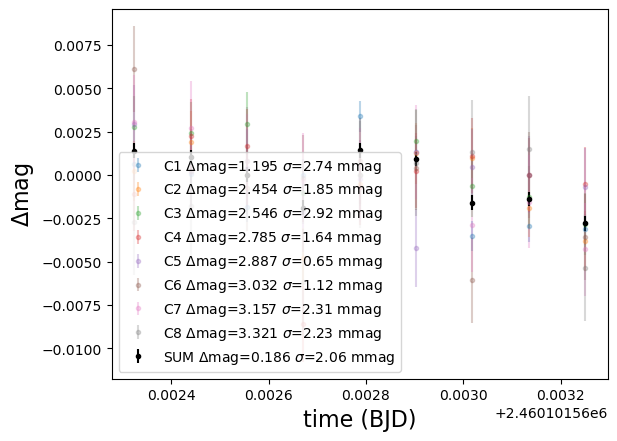

<Table length=9>
       TIME                x                 y                fwhm        ...        magsum             magsum_err            diffmagsum      
     float64            float64           float64           float64       ...       float64              float64               float64        
------------------ ----------------- ----------------- ------------------ ... ------------------- --------------------- ----------------------
 2460101.563250399 727.3323386316014 934.6519488743174 12.503458990114884 ... -16.952656047126958  0.006127664678568984 -0.0028022995772509773
 2460101.562555667 727.8323386316014 935.4019488743174 12.723357777237698 ...   -16.9486580529484  0.006192927549282958                    0.0
2460101.5626714495 728.0823386316014 935.1519488743174 15.371170680999318 ...  -16.93407269586683  0.006231207300569489 -0.0018936905275381832
2460101.5630188216 727.8323386316014 933.6519488743174 12.680832763240975 ...  -16.95456603278146  0.006143110788934279  -0.001594872502405309
2460101.5631346046 729.3323386316014 934.1519488743174  12.64508923833788 ...  -16.95249413260871  0.006144597323980241   -0.00139100847068363
 2460101.562787244 727.5823386316014 934.4019488743174  14.96187586096229 ...  -16.93741632403391  0.006220886699782145  0.0014109921676030979
 2460101.562903027 727.0823386316014 933.9019488743174  13.07597449534489 ...  -16.94916122290383  0.006176179301287586   0.000911093297947474
 2460101.562439872 727.5823386316014 935.4019488743174 12.787511735878839 ... -16.949196848462186 0.0061581528806803265  0.0010062172283724635
 2460101.562324089 728.0823386316014 935.1519488743174 12.823894466337519 ...   -16.9507939685171  0.006148293705064845  0.0013873056294997355

In [12]:
# Select target index
target = 0
# Select comparisons 
comps = [1, 2, 3, 4, 5, 6, 7, 8]

# plot light curve
s4plt.plot_light_curve(phot_ts_product,
                            target=target,
                            comps=comps,
                            nsig=10,
                            plot_coords=True,
                            plot_rawmags=True,
                            plot_sum=True,
                            plot_comps=True,
                            catalog_name=p['PHOT_REF_CATALOG_NAME'])